In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8148148148148148, Loss: 0.7029452147307219
Checkpoint 20, Accuracy: 0.845679012345679, Loss: 0.5034391261913158
Checkpoint 30, Accuracy: 0.8641975308641975, Loss: 0.49334285877369066
Checkpoint 40, Accuracy: 0.8888888888888888, Loss: 0.5264530535097476
Checkpoint 50, Accuracy: 0.9506172839506173, Loss: 0.48636676647044996
Checkpoint 60, Accuracy: 0.9382716049382716, Loss: 0.3550622374923141
Checkpoint 70, Accuracy: 0.9320987654320988, Loss: 0.3298878139919705
Checkpoint 80, Accuracy: 0.9629629629629629, Loss: 0.2597290674845378
Checkpoint 90, Accuracy: 0.9567901234567902, Loss: 0.24596978999950267
Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.19442425833808052
Checkpoint 110, Accuracy: 0.9629629629629629, Loss: 0.19361148057160554
Checkpoint 120, Accuracy: 0.9629629629629629, Loss: 0.19144777015403466
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.13688445974279334
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.13137870364718968
Checkpoi

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [9.6603972e-01 6.9266075e-04 3.3267591e-02]
[1. 0. 0.] <-> [9.8830402e-01 7.9281395e-04 1.0903136e-02]
[1. 0. 0.] <-> [0.99518484 0.00198402 0.0028311 ]
[1. 0. 0.] <-> [9.8411590e-01 7.5528427e-04 1.5128811e-02]
[1. 0. 0.] <-> [0.99524504 0.00113996 0.00361502]
[0. 0. 1.] <-> [5.9640915e-03 2.5706534e-06 9.9403340e-01]
[1. 0. 0.] <-> [9.9595743e-01 9.9330617e-04 3.0492793e-03]
[1. 0. 0.] <-> [9.8474288e-01 7.5473619e-04 1.4502466e-02]
[1. 0. 0.] <-> [9.9356890e-01 9.0017956e-04 5.5309534e-03]
[1. 0. 0.] <-> [7.9516572e-01 5.0647085e-04 2.0432781e-01]
[1. 0. 0.] <-> [0.99576974 0.00131789 0.00291239]
[0. 1. 0.] <-> [1.4813092e-02 9.8499334e-01 1.9365179e-04]
[0. 0. 1.] <-> [5.9471675e-03 2.5630300e-06 9.9405020e-01]
[0. 1. 0.] <-> [3.187726e-02 9.677991e-01 3.235943e-04]
[1. 0. 0.] <-> [9.9405861e-01 8.7343063e-04 5.0678756e-03]
[0. 0. 1.] <-> [5.9469710e-03 2.5629279e-06 9.9405044e-01]
[0. 0. 1.] <-> [5.9469622e-03 2.5629133e-06 9.9405044e-01]
[1. 0. 0.] <-> [0.9932476  

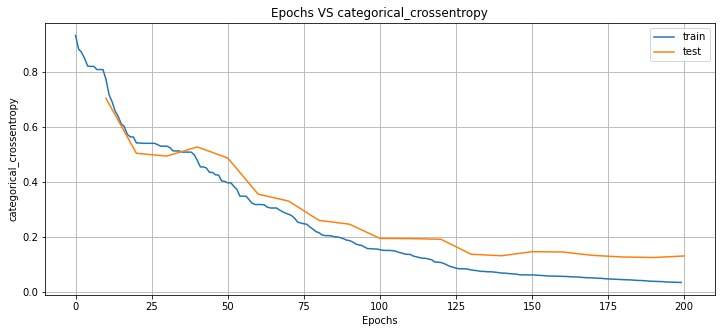

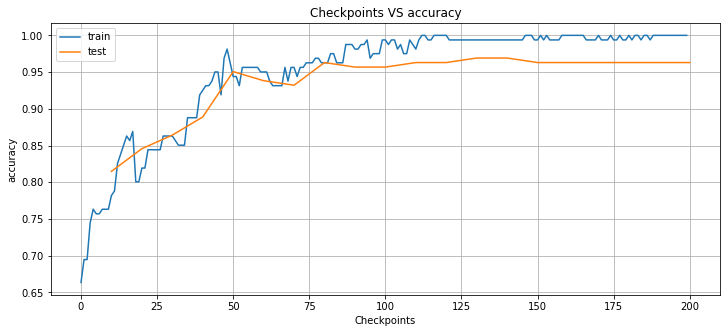

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8148148148148148, 'mean_square_error': 0.4210741582174156, 'categorical_crossentropy': 0.7029452147307219, 'essential_metrics': {0: {'tp_hit': 62, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 18}, 1: {'tp_hit': 13, 'fp_hit': 13, 'tn_hit': 80, 'fn_hit': 2}, 2: {'tp_hit': 3, 'fp_hit': 5, 'tn_hit': 90, 'fn_hit': 10}}, 'checkpoint': 10} 


{'accuracy': 0.845679012345679, 'mean_square_error': 0.2957279618794108, 'categorical_crossentropy': 0.5034391261913158, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 24, 'tn_hit': 4, 'fn_hit': 1}, 1: {'tp_hit': 4, 'fp_hit': 1, 'tn_hit': 92, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 13}}, 'checkpoint': 20} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 0.2886077523026663, 'categorical_crossentropy': 0.49334285877369066, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 15, 'tn_hit': 13, 'fn_hit': 7}, 1: {'tp_hit': 13, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 2}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 95, 'fn_

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.721624   3.         0.8214314 -1.4572787 -3.       ]
 bias: 2.8924074172973633

Neuron 1: weights:
[ 3.         -3.         -2.5639646   0.01470836  1.6669813 ]
 bias: 1.9917798042297363

Neuron 2: weights:
[-0.41391173 -2.956207    0.61804336  2.6451437   3.        ]
 bias: -1.7007482051849365

Neuron 3: weights:
[ 1.3495662 -3.        -2.085408  -0.2550341  2.564305 ]
 bias: 3.0

$
Layer 2
Neuron 0: weights:
[ 3.         2.3246336 -2.3608367  3.       ]
 bias: -1.1973168849945068

Neuron 1: weights:
[ 3.        -2.9830108 -3.        -3.       ]
 bias: 3.0

Neuron 2: weights:
[-3.         3.         3.         0.4214271]
 bias: 0.4639601707458496

$

